In [7]:
import tensorflow as tf
import cv2
import numpy as np
from matplotlib import pyplot as plt


In [8]:
data_dir = 'F:\MACHINE LEARNING\Train'

In [9]:
data = tf.keras.utils.image_dataset_from_directory(data_dir, image_size=(224, 224), batch_size=4)
print(data.class_names)
class_names = data.class_names

Found 300 files belonging to 3 classes.
['Mobil', 'Pesawat', 'Sepeda']


In [10]:
data_iterator = data.as_numpy_iterator()
print("data_iterator", data_iterator)

data_iterator <tensorflow.python.data.ops.dataset_ops._NumpyIterator object at 0x0000022827ABF8C0>


In [11]:
batch = data_iterator.next()
print("batch", batch)

batch (array([[[[255.      , 255.      , 255.      ],
         [255.      , 255.      , 255.      ],
         [255.      , 255.      , 255.      ],
         ...,
         [255.      , 255.      , 255.      ],
         [255.      , 255.      , 255.      ],
         [255.      , 255.      , 255.      ]],

        [[255.      , 255.      , 255.      ],
         [255.      , 255.      , 255.      ],
         [255.      , 255.      , 255.      ],
         ...,
         [255.      , 255.      , 255.      ],
         [255.      , 255.      , 255.      ],
         [255.      , 255.      , 255.      ]],

        [[255.      , 255.      , 255.      ],
         [255.      , 255.      , 255.      ],
         [255.      , 255.      , 255.      ],
         ...,
         [255.      , 255.      , 255.      ],
         [255.      , 255.      , 255.      ],
         [255.      , 255.      , 255.      ]],

        ...,

        [[255.      , 255.      , 255.      ],
         [255.      , 255.      , 255.

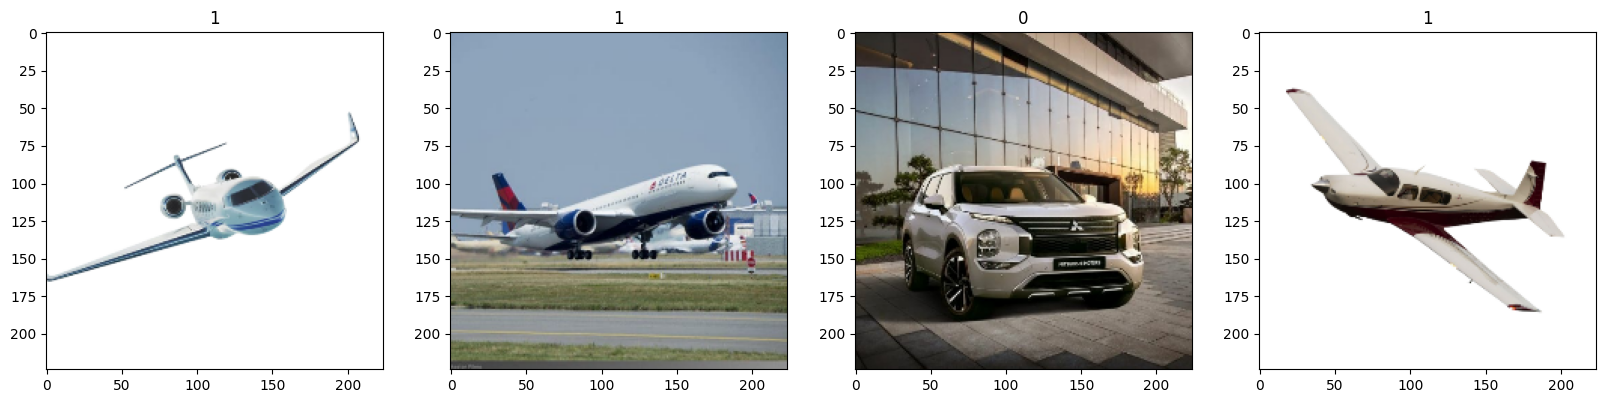

In [12]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [13]:
data = data.map(lambda x, y: (x / 255.0, y))
print("Tipe data setelah normalisasi: {}".format(data.element_spec))
print("Jumlah data", len(data))

Tipe data setelah normalisasi: (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
Jumlah data 75


In [14]:
total_batches = len(data)
train_size = int(total_batches * 0.8)
val_size = int(total_batches * 0.1)
test_size = int(total_batches * 0.1)

print(train_size)
print(val_size)
print(test_size)

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size)

60
7
7


In [15]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model

def VGG_16(input_shape=(224, 224, 3), num_classes=3):
    # Input layer
    inputs = Input(shape=input_shape)
    
    # Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2))(x)
    
    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2))(x)
    
    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2))(x)
    
    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2))(x)
    
    # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2))(x)
    
    x = Flatten()(x)
    x = Dense(4096, activation='relu')(x)
    x = Dense(4096, activation='relu')(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    
    # Pembuatan Model
    model = Model(inputs, outputs)
    return model

model = VGG_16()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                             

In [16]:
model.compile(optimizer='adamax', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                             

In [17]:
history = model.fit(train, epochs=20, validation_data = val)

Epoch 1/20
60/60 [==============================] - 263s 4s/step - loss: 3.1368 - accuracy: 0.3500 - val_loss: 1.0977 - val_accuracy: 0.3214
Epoch 2/20
60/60 [==============================] - 238s 4s/step - loss: 1.0987 - accuracy: 0.3625 - val_loss: 1.1079 - val_accuracy: 0.2143
Epoch 3/20
60/60 [==============================] - 241s 4s/step - loss: 1.0989 - accuracy: 0.3583 - val_loss: 1.1086 - val_accuracy: 0.2857
Epoch 4/20
60/60 [==============================] - 239s 4s/step - loss: 1.0505 - accuracy: 0.3917 - val_loss: 1.0805 - val_accuracy: 0.5357
Epoch 5/20
60/60 [==============================] - 239s 4s/step - loss: 0.9941 - accuracy: 0.5917 - val_loss: 0.9354 - val_accuracy: 0.6071
Epoch 6/20
60/60 [==============================] - 239s 4s/step - loss: 0.8609 - accuracy: 0.6500 - val_loss: 0.6555 - val_accuracy: 0.7857
Epoch 7/20
60/60 [==============================] - 244s 4s/step - loss: 0.6171 - accuracy: 0.7542 - val_loss: 0.4218 - val_accuracy: 0.8214
Epoch 8/20
60

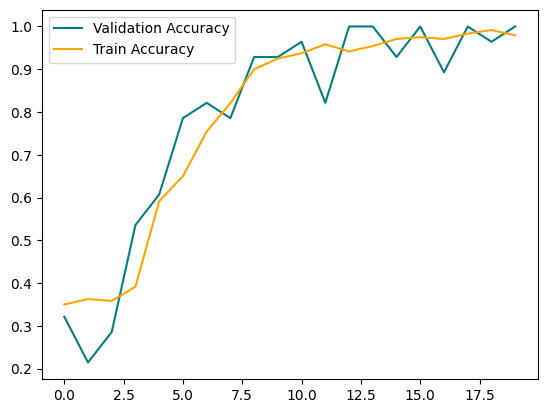

In [18]:
fig = plt.figure()
plt.plot(history.history['val_accuracy'], color='teal', label='Validation Accuracy')
plt.plot(history.history['accuracy'], color='orange', label='Train Accuracy')
plt.legend(loc="upper left")
plt.show()

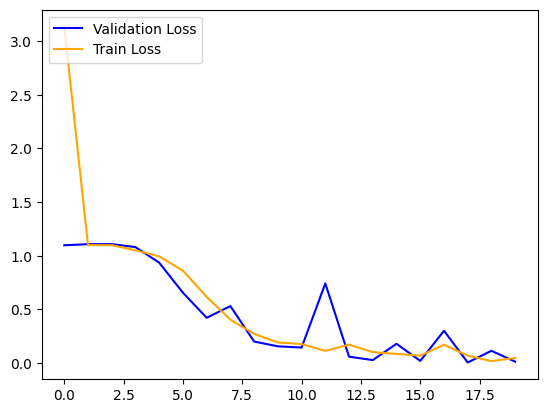

In [19]:
fig = plt.figure()
plt.plot(history.history['val_loss'], color='blue', label='Validation Loss')
plt.plot(history.history['loss'], color='orange', label='Train Loss')
plt.legend(loc="upper left")
plt.show()

In [21]:
model.evaluate(test)
model.save('F:\MACHINE LEARNING/VGG16_Kendaraan.h5')

8/8 [==============================] - 8s 537ms/step - loss: 0.0234 - accuracy: 1.0000


In [2]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
model = tf.keras.models.load_model('F:\MACHINE LEARNING/VGG16_Kendaraan.h5')

(1, 224, 224, 3)


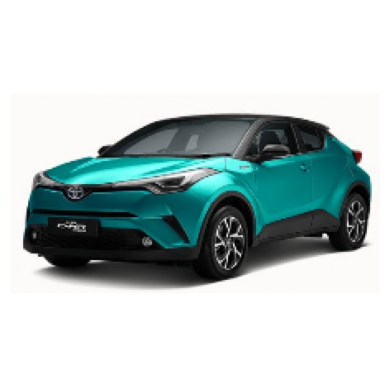

1/1 [==============================] - 0s 451ms/step
Kendaraan: Mobil
Confidence: 99.97091889381409
(1, 224, 224, 3)


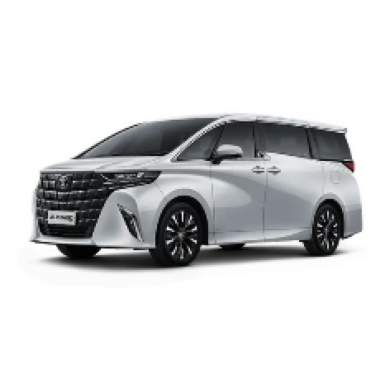

1/1 [==============================] - 0s 173ms/step
Kendaraan: Mobil
Confidence: 99.99439716339111
(1, 224, 224, 3)


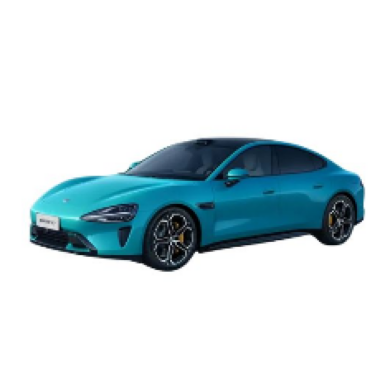

1/1 [==============================] - 0s 176ms/step
Kendaraan: Mobil
Confidence: 99.97342228889465
(1, 224, 224, 3)


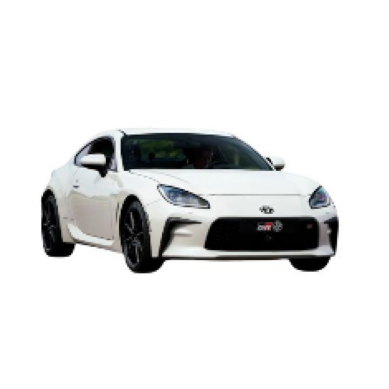

1/1 [==============================] - 0s 254ms/step
Kendaraan: Mobil
Confidence: 99.99994039535522
(1, 224, 224, 3)


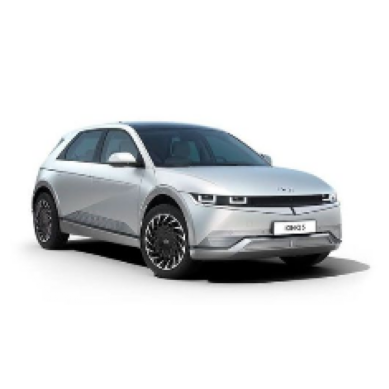

1/1 [==============================] - 0s 176ms/step
Kendaraan: Mobil
Confidence: 99.99918937683105
(1, 224, 224, 3)


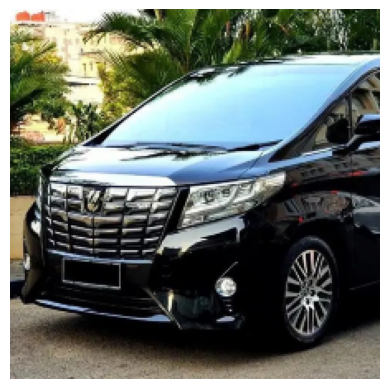

1/1 [==============================] - 0s 194ms/step
Kendaraan: Pesawat
Confidence: 55.95613121986389
(1, 224, 224, 3)


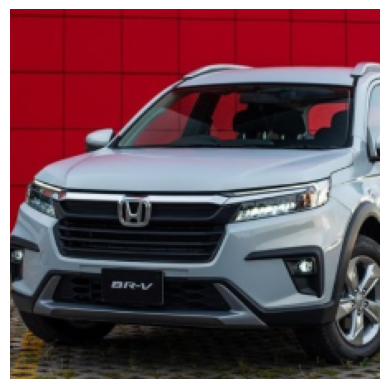

1/1 [==============================] - 0s 185ms/step
Kendaraan: Sepeda
Confidence: 99.45605397224426
(1, 224, 224, 3)


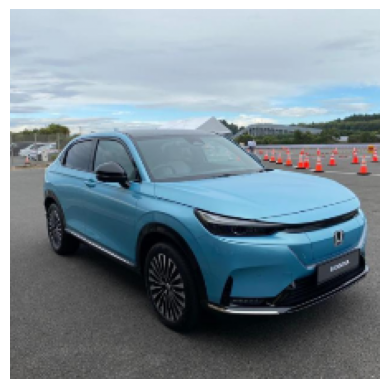

1/1 [==============================] - 0s 196ms/step
Kendaraan: Mobil
Confidence: 72.75394201278687
(1, 224, 224, 3)


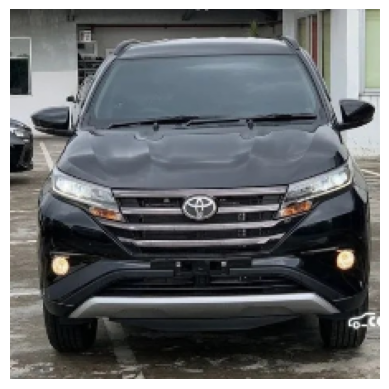

1/1 [==============================] - 0s 169ms/step
Kendaraan: Pesawat
Confidence: 94.00577545166016
(1, 224, 224, 3)


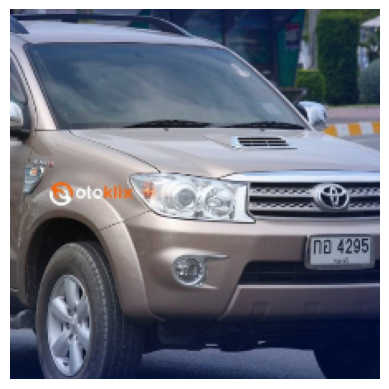

1/1 [==============================] - 0s 207ms/step
Kendaraan: Pesawat
Confidence: 99.99923706054688
(1, 224, 224, 3)


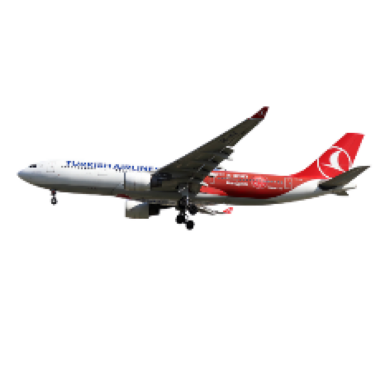

1/1 [==============================] - 0s 207ms/step
Kendaraan: Pesawat
Confidence: 100.0
(1, 224, 224, 3)


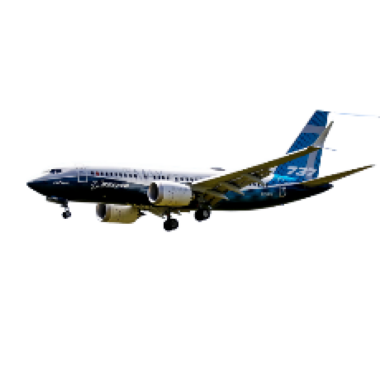

1/1 [==============================] - 0s 199ms/step
Kendaraan: Pesawat
Confidence: 100.0
(1, 224, 224, 3)


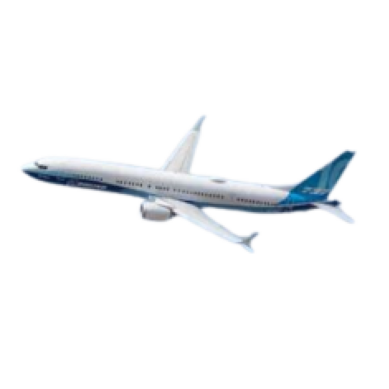

1/1 [==============================] - 0s 212ms/step
Kendaraan: Pesawat
Confidence: 100.0
(1, 224, 224, 3)


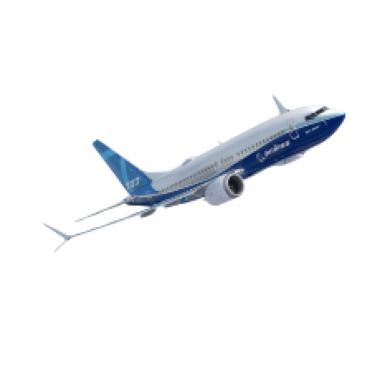

1/1 [==============================] - 0s 221ms/step
Kendaraan: Pesawat
Confidence: 100.0
(1, 224, 224, 3)


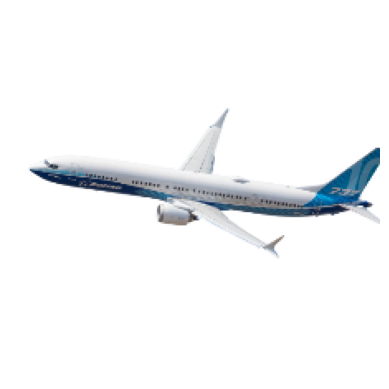

1/1 [==============================] - 0s 307ms/step
Kendaraan: Pesawat
Confidence: 100.0
(1, 224, 224, 3)


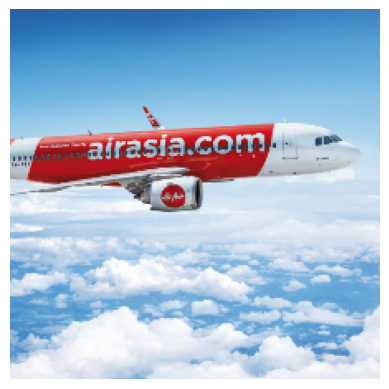

1/1 [==============================] - 0s 289ms/step
Kendaraan: Pesawat
Confidence: 99.99998807907104
(1, 224, 224, 3)


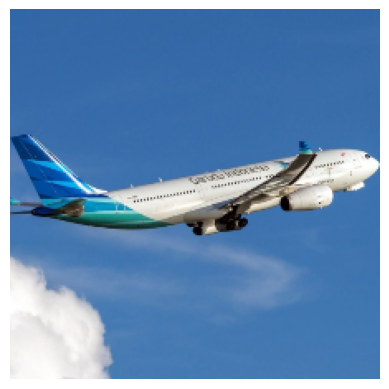

1/1 [==============================] - 0s 163ms/step
Kendaraan: Pesawat
Confidence: 99.99998807907104
(1, 224, 224, 3)


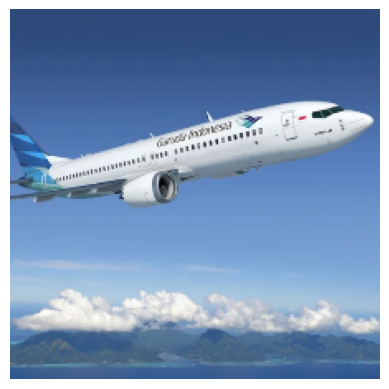

1/1 [==============================] - 0s 229ms/step
Kendaraan: Pesawat
Confidence: 100.0
(1, 224, 224, 3)


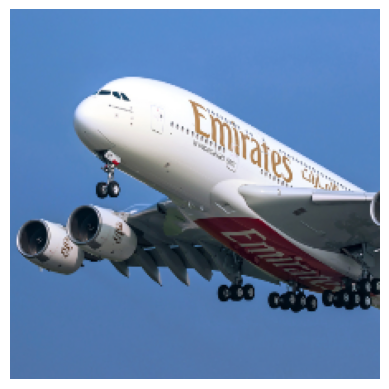

1/1 [==============================] - 0s 171ms/step
Kendaraan: Pesawat
Confidence: 99.73403811454773
(1, 224, 224, 3)


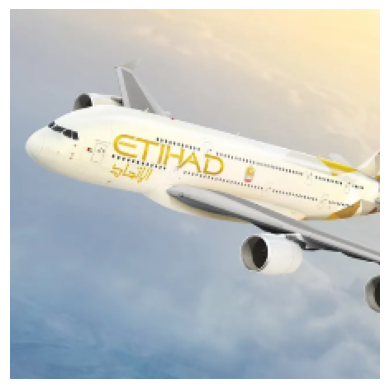

1/1 [==============================] - 0s 188ms/step
Kendaraan: Pesawat
Confidence: 99.99984502792358
(1, 224, 224, 3)


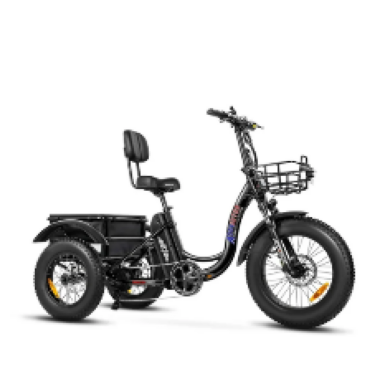

1/1 [==============================] - 0s 159ms/step
Kendaraan: Sepeda
Confidence: 99.99738931655884
(1, 224, 224, 3)


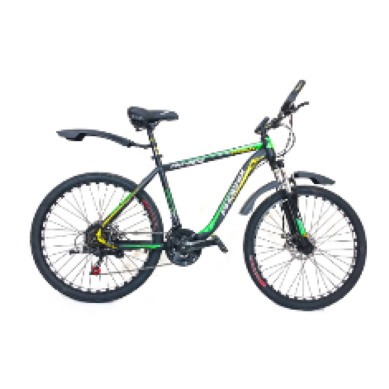

1/1 [==============================] - 0s 275ms/step
Kendaraan: Sepeda
Confidence: 99.99673366546631
(1, 224, 224, 3)


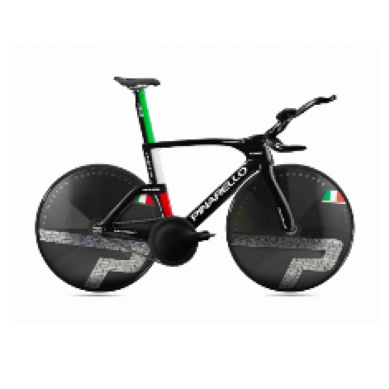

1/1 [==============================] - 0s 186ms/step
Kendaraan: Sepeda
Confidence: 100.0
(1, 224, 224, 3)


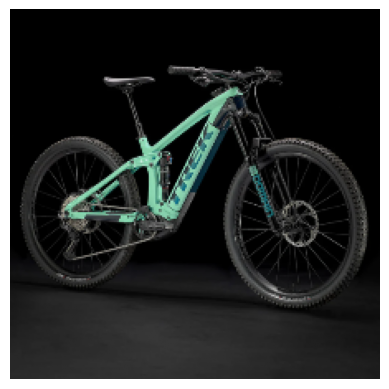

1/1 [==============================] - 0s 222ms/step
Kendaraan: Sepeda
Confidence: 92.36862063407898
(1, 224, 224, 3)


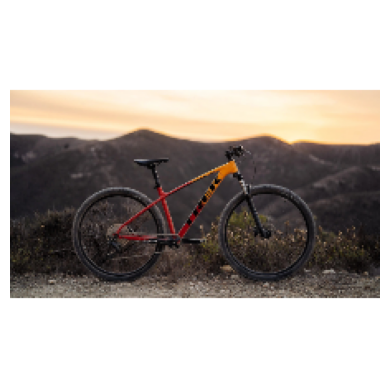

1/1 [==============================] - 0s 162ms/step
Kendaraan: Pesawat
Confidence: 83.89308452606201
(1, 224, 224, 3)


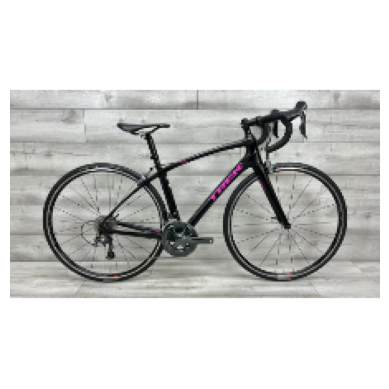

1/1 [==============================] - 0s 267ms/step
Kendaraan: Sepeda
Confidence: 99.99918937683105
(1, 224, 224, 3)


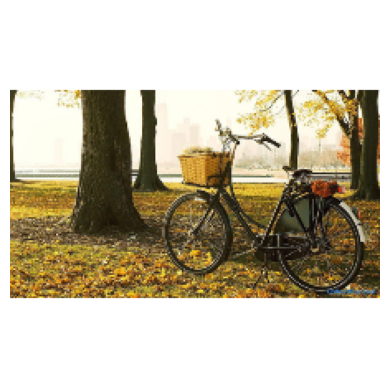

1/1 [==============================] - 0s 154ms/step
Kendaraan: Sepeda
Confidence: 99.94675517082214
(1, 224, 224, 3)


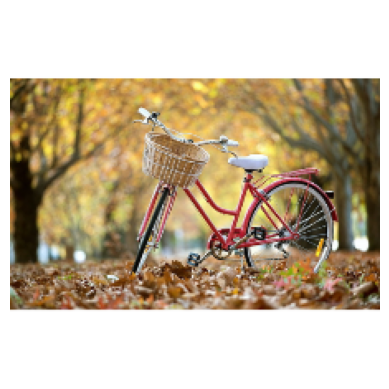

1/1 [==============================] - 0s 164ms/step
Kendaraan: Sepeda
Confidence: 99.89439845085144
(1, 224, 224, 3)


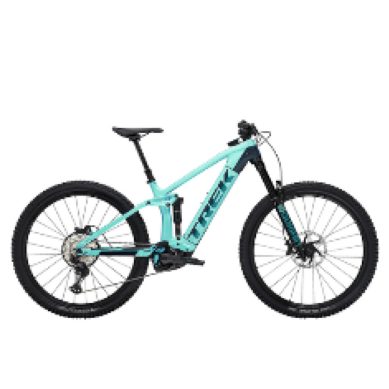

1/1 [==============================] - 0s 413ms/step
Kendaraan: Sepeda
Confidence: 100.0
(1, 224, 224, 3)


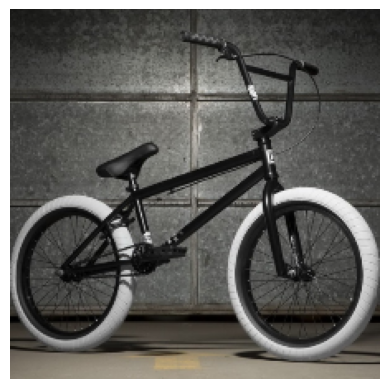

1/1 [==============================] - 0s 201ms/step
Kendaraan: Sepeda
Confidence: 97.93899655342102


In [7]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_paths = [
    'F:\MACHINE LEARNING\Test\mobil101.jpg',
    'F:\MACHINE LEARNING\Test\mobil102.jpg',
    'F:\MACHINE LEARNING\Test\mobil103.jpg',
    'F:\MACHINE LEARNING\Test\mobil104.jpg',
    'F:\MACHINE LEARNING\Test\mobil105.jpg',
    'F:\MACHINE LEARNING\Test\mobil106.jpg',
    'F:\MACHINE LEARNING\Test\mobil107.jpg',
    'F:\MACHINE LEARNING\Test\mobil108.jpg',
    'F:\MACHINE LEARNING\Test\mobil109.jpg',
    'F:\MACHINE LEARNING\Test\mobil110.jpg',
    'F:\MACHINE LEARNING\Test\pesawat101.png',
    'F:\MACHINE LEARNING\Test\pesawat102.png',
    'F:\MACHINE LEARNING\Test\pesawat103.png',
    'F:\MACHINE LEARNING\Test\pesawat104.png',
    'F:\MACHINE LEARNING\Test\pesawat105.png',
    'F:\MACHINE LEARNING\Test\pesawat106.png',
    'F:\MACHINE LEARNING\Test\pesawat107.png',
    'F:\MACHINE LEARNING\Test\pesawat108.png',
    'F:\MACHINE LEARNING\Test\pesawat109.png',
    'F:\MACHINE LEARNING\Test\pesawat110.png',
    'F:\MACHINE LEARNING\Test\sepeda101.png',
    'F:\MACHINE LEARNING\Test\sepeda102.png',
    'F:\MACHINE LEARNING\Test\sepeda103.png',
    'F:\MACHINE LEARNING\Test\sepeda104.png',
    'F:\MACHINE LEARNING\Test\sepeda105.png',
    'F:\MACHINE LEARNING\Test\sepeda106.png',
    'F:\MACHINE LEARNING\Test\sepeda107.png',
    'F:\MACHINE LEARNING\Test\sepeda108.png',
    'F:\MACHINE LEARNING\Test\sepeda109.png',
    'F:\MACHINE LEARNING\Test\sepeda110.png'
]

class_names = ['Mobil', 'Pesawat', 'Sepeda']

for link in image_paths:
    img = cv2.imread(link)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_rgb_resized = cv2.resize(img_rgb, (224, 224))
    img_rgb_resized = img_rgb_resized / 255.0

    img_rgb_expanded = np.expand_dims(img_rgb_resized, axis=0)

    print(img_rgb_expanded.shape)

    plt.imshow(img_rgb_resized)
    plt.axis('off')
    plt.show()

    pred = model.predict(img_rgb_expanded)
    
    predicted_class_index = np.argmax(pred)
    confidence = pred[0][predicted_class_index] * 100
    
    print("Kendaraan:", class_names[predicted_class_index])
    print("Confidence:", confidence)